# Load and prepare Data

Initially, we import the gold standard into a dataframe and seperate the annotations provided by human annotators from the potenitally antisemetic tweets. The tweets will undergo annotation by the LLM later in our experiment, while the human annotations will provide the benchmark against which the LLM's annotations will be evaluated.

In [1]:
import pandas as pd
path = "../input/data/Updated_dataset_with_full_text/Updated_dataset_with_full_text.csv"
df = pd.read_csv(path)

df

,TweetID,Username,CreateDate,Biased,Keyword,Text
0,1232258532273090560,amit2nirvana,2020-02-25 10:58:23+00:00,0,Israel,The last 24 hours in Israel: https://t.co/0YNw...
1,1224025761092448257,NinjaAlex420,2020-02-02 17:44:17+00:00,0,Israel,@stranahan KnowMoreNews isn't confident enough...
2,1242382710561107969,SevenShepherd,2020-03-24 09:28:15+00:00,0,Israel,"""[Even] an heritage unto Israel his servant: f..."
3,1224677205306818561,MGSheikh8,2020-02-04 12:52:53+00:00,0,Israel,Opinion: No One in Israel Knew They Were Commi...
4,1214278369338109953,elianebis1,2020-01-06 20:11:38+00:00,0,Israel,https://t.co/LTB0zidzM9 When #TheCloudOfGod ap...
...,...,...,...,...,...,...
6936,1255850426899013632,TAG73957257,2020-04-30 13:24:09+00:00,1,ZioNazi,@JackieKane I'd never go back. ZioNazi managem...
6937,1234276923213303812,totalsatire,2020-03-02 00:38:44+00:00,1,ZioNazi,@JulianRoepcke The lovely Zionazi Djihad Julia...
6938,1240883925096030208,Futatimbo,2020-03-20 06:12:36+00:00,1,ZioNazi,@IvankaTrump A zionazists Jews.
6939,1241091821645844480,Futatimbo,2020-03-20 19:58:43+00:00,1,ZioNazi,"Mr. President, I this year you will lead the I..."


In [2]:
import re

filtered_df = df[~df["Text"].str.contains(r'https?://\S+', case=False, regex=True)]

print(df.shape)
print(filtered_df.shape)

# Resetting the indices
filtered_df = filtered_df.reset_index(drop=True)

filtered_df["Keyword"].value_counts(normalize=True)

(6941, 6)
(3235, 6)


Jews       0.691808
Israel     0.187326
ZioNazi    0.076352
Kikes      0.044513
Name: Keyword, dtype: float64

## Annotate Data

In [3]:
from langchain.callbacks.manager import CallbackManager
from langchain.callbacks.streaming_stdout import StreamingStdOutCallbackHandler
from langchain.chat_models import ChatOllama

#https://anakin.ai/blog/dolphin-2-5-mixtral-8x7b-uncensored-mistral/
chat_model = ChatOllama(
    model="dolphin-mistral", 
    callback_manager=CallbackManager([StreamingStdOutCallbackHandler()]),
)

In [4]:
from langchain.schema import HumanMessage

messages = [HumanMessage(content="How are you")]
response = chat_model(messages)

Hello! I'm feeling happy and ready to provide you with the assistance that you need! How can I help you today?

In [5]:
prompt_path = '../input/prompts/prompt_3.txt'

with open(prompt_path, 'r') as file:
    prompt = file.read()

prompt = prompt.replace('\n', ' ')
prompt

"<|im_start|>system You are Dolphin, an expert on Antisemitism working as a Tweet-Annotator, tasked with checking if tweets are antisemitic or not. You use the following definition of antisemitism: Antisemitism is a certain perception of Jews, which may be expressed as hatred toward Jews. Rhetorical and physical manifestations of antisemitism are directed toward Jewish or non-Jewish individuals or their property, toward Jewish community institutions and religious facilities. Antisemitism might include the targeting of the state of Israel, conceived as a Jewish collectivity. However, criticism of Israel similar to that leveled against any other country cannot be regarded as antisemitic. Antisemitism frequently charges Jews with conspiring to harm humanity, and it is often used to blame Jews for “why things go wrong.” Contemporary examples of antisemitism include: 1. Calling for or justifying the harming of Jews. 2. Making dehumanizing, demonizing, or stereotypical allegations about Jews

In [16]:
import numpy as np

# add predictions column if it doesn't exist
if "Predictions" not in filtered_df.columns:
    filtered_df["Prediction"] = np.nan

for index, row in filtered_df.iterrows():
    print(f"Row {index}:", end=" ")
    
    if pd.isna(row["Prediction"]):
        messages = [HumanMessage(content= prompt + row["Text"] + " <|im_end|><|im_start|>assistant")]
        answer = str(chat_model(messages))
        filtered_df.at[index, "Prediction"] = answer
        print("")
        
    else:
        print("Row skipped")

Row 0: 0
Row 1: 1
Row 2: 0
Row 3: 0
Row 4: 0
Row 5: 0
Row 6: 0
Row 7: 0
Row 8: 0
Row 9: 0
Row 10: 0
Row 11: 0
Row 12: 0
Row 13: 0
Row 14: 0
Row 15: 0
Row 16: 0
Row 17: 1
Row 18: 0
Row 19: 0
Row 20: 0
Row 21: 0
Row 22: 0
Row 23: 0
Row 24: 0
Row 25: 0
Row 26: 0
Row 27: 0
Row 28: 0
Row 29: 0
Row 30: 0
Row 31: 0
Row 32: 0
Row 33: 0
Row 34: 0
Row 35: 0
Row 36: 0
Row 37: 0
Row 38: 0
Row 39: 0
Row 40: 0
Row 41: 0
Row 42: 0
Row 43: 0
Row 44: 0
Row 45: 0
Row 46: 1
Row 47: 0
Row 48: 0
Row 49: 0
Row 50: 0
Row 51: 0
Row 52: 0
Row 53: 1
Row 54: 0
Row 55: 0
Row 56: 0
Row 57: 0
Row 58: 0
Row 59: 0
Row 60: 1
Row 61: 0
Row 62: 0
Row 63: 0
Row 64: 0
Row 65: 0
Row 66: 0
Row 67: 0
Row 68: 0
Row 69: 0
Row 70: 0
Row 71: 0
Row 72: 0
Row 73: 0
Row 74: 0
Row 75: 0
Row 76: 0
Row 77: 0
Row 78: 1
Row 79: 0
Row 80: 0
Row 81: 1
Row 82: 0
Row 83: 0
Row 84: 0
Row 85: 0
Row 86: 0
Row 87: 0
Row 88: 0
Row 89: 1
Row 90: 0
Row 91: 1
Row 92: 0
Row 93: 0
Row 94: 0
Row 95: 0
Row 96: 0
Row 97: 0
Row 98: 0
Row 99: 0
Row 100: 0

In [17]:
"""
# Save annotations to csv
from pathlib import Path  
filepath = Path("../output/annotations/experiment_4.csv")
filtered_df.to_csv(filepath)
"""

# Data Cleaning

As the model did not always adhere to the specified answer-format, its predictions need to be converted to booleans. 


In [6]:
import pandas as pd
df = pd.read_csv("../output/annotations/experiment_mistral_prompt_3.csv")
df["Prediction"].value_counts()

content='0'                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      2003
content='1'                                                                                                                                                                                                                                                                                                                                                                                                                                                       

As we can see, most of the answers are actually correctly formatted as booleans, while lots of others at least contain the booleans with some slight variations.
 Accordingly, we should be able to standartize the models output manually. To do so, let's:
- remove prefixes "content=", "[\INST]" and "[INST]"
- convert text to lowercase
- remove punctuation
- remove leading and trailing whitespaces


In [9]:
# Remove 'content=' from the beginning of each string
df["Prediction"] = df['Prediction'].str.replace('^content=','', regex=True)

# Remove newlines
df['Prediction'] = df['Prediction'].str.replace('\n', '', regex=True)

# Convert the text to lowercase
df['Prediction'] = df['Prediction'].str.lower()

# Remove '[INST]' and its variations from the text
df["Prediction"] = df['Prediction'].str.replace('\[inst\]','', regex=True)
df["Prediction"] = df['Prediction'].str.replace(r'\[\\inst\]', '', regex=True)
df["Prediction"] = df['Prediction'].str.replace('inst','', regex=True)

# Remove punctuation
df["Prediction"] = df['Prediction'].str.replace('[^\w\s]','', regex=True)

# remove leading and trailing whitespaces
df["Prediction"] = df['Prediction'].str.strip()

df["Prediction"].value_counts()

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        2007
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

As we now mostly have answers given as text or booleans with additional text left, we can use a rules-based approach to convert the most recent text based answers into booleans. 

In [10]:
df["Prediction_to_Boolean"] = df["Prediction"]

# Replace all text containing the string 1 or 0 with the booleans 1 or 0
df.loc[df["Prediction_to_Boolean"].str.contains("1"), "Prediction_to_Boolean"] = "1"
df.loc[df["Prediction_to_Boolean"].str.contains("0"), "Prediction_to_Boolean"] = "0"
df["Prediction_to_Boolean"].value_counts()

0                                                                                                                                                                                                                                                          2008
1                                                                                                                                                                                                                                                          1226
tweets are not available in this environment but if i were working as an aibased tweet annotator my decision would depend on the content of the tweet youve provided please include a textual representation of the tweet to receive a response thanksn       1
Name: Prediction_to_Boolean, dtype: int64

The instances we couldn't transform to booleans are now dropped. Afterwards we convert all values to integers. 

In [11]:
# Create a new DataFrame containing only the rows whose predictions we were able to convert into 0 or 1
df_booleans = df[df["Prediction_to_Boolean"].isin(["0", "1"])]

# Convert values in the modified prediction column to integer using .loc
df_booleans.loc[:, "Prediction_to_Boolean"] = df_booleans["Prediction_to_Boolean"].astype(int)

# Display all unique values in our cleaned-up prediction column
display(df_booleans["Prediction_to_Boolean"].value_counts().head())

diff = len(df) - len(df_booleans)
print(f"Difference between the full dataset and dataset without the rows we just dropped: {diff}")


/var/folders/wv/j42m3p7n5jl51rggmnpn_6940000gn/T/ipykernel_99911/1219482065.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_booleans.loc[:, "Prediction_to_Boolean"] = df_booleans["Prediction_to_Boolean"].astype(int)


0    2008
1    1226
Name: Prediction_to_Boolean, dtype: int64

Difference between the full dataset and dataset without the rows we just dropped: 1


As we can see, we lost only one tweet because the model did not give a conclusive prediction in this case. 

# Evaluation

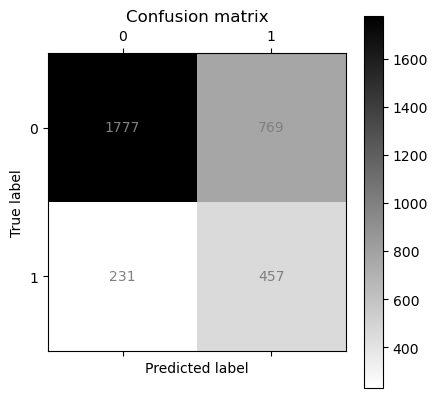

              precision    recall  f1-score   support

           0       0.88      0.70      0.78      2546
           1       0.37      0.66      0.48       688

    accuracy                           0.69      3234
   macro avg       0.63      0.68      0.63      3234
weighted avg       0.78      0.69      0.72      3234



In [48]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

cm = confusion_matrix(df_booleans["Biased"], df_booleans["Prediction_to_Boolean"])
plt.matshow(cm, cmap='binary')
plt.title('Confusion matrix')

# Add text annotations
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, str(cm[i, j]), ha='center', va='center', color='grey')

plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print(classification_report(df_booleans["Biased"], df_booleans["Prediction_to_Boolean"]))


# False Positives
Let's take a closer look at the errors.

In [40]:
mask = (df_booleans["Biased"] == 0) & (df_booleans["Prediction_to_Boolean"] == 1)
fp_df = df_booleans[mask]

pd.set_option('display.max_colwidth', None)
fp_df.head()

,Unnamed: 0,TweetID,Username,CreateDate,Biased,Keyword,Text,Prediction,Prediction_to_Boolean
17,17,1215679094903451655,susanjfeingold,2020-01-10 16:57:37+00:00,0,Israel,"#BDS#supporters ""pervasive anti-Semitic rhetoric among boycott supporters that too often equates all things Israel and Jewish with the oppression of Palestinian rights."" @jstreetdotorg",1,1
46,46,1251688515085012992,RenoTraci88,2020-04-19 01:46:11+00:00,0,Israel,"Trump’s now saying saying AOC +3 are anti-Israel. Just fyi, his pet name for Kusher was ‘The Jew’ at ‘Celebrity Apprentice’ not a joke fyi. @realDonaldTrump",1,1
60,60,1294016966877949954,ShaiYehudi,2020-08-13 21:04:21+00:00,0,Israel,"@stefanie7colli1 The problem is we have a bunch of ""White Exceptionalism"" that proudly and carelessly excludes their own Countrymen who look different, as being foreigners.\n\nBiblical Egyptians were like-minded against Israeli slaves.\n\nGod forbids Israel from exhibiting those same evil actions.",1,1
81,81,1285623679607623684,ThrwLkngGlss,2020-07-21 17:12:25+00:00,0,Israel,"@jdforward She's only willing to call out the anti semitism in the US, while vilifying the Jews of Israel, more than half of which are descended from Mizrahim, aka refugees from muslim countries.\n\nMr. Gerber is an upper middle class American whose family wasnt forced to Israel for survival",1,1
89,89,1271801298334121984,bhindiboi,2020-06-13 13:47:13+00:00,0,Israel,israel is set to begin annexing over THIRTY PERCENT of the west bank in less than three weeks. i don’t wanna hear SHIT from liberal zionists pretending to care while actively supporting a state and ideology whose very core principle is land theft.,1,1


# False Negatives


In [49]:
mask = (df_booleans["Biased"] == 1) & (df_booleans["Prediction_to_Boolean"] == 0)
fn_df = df_booleans[mask]

pd.set_option('display.max_colwidth', None)
fn_df.head(20)

,Unnamed: 0,TweetID,Username,CreateDate,Biased,Keyword,Text,Prediction,Prediction_to_Boolean
20,20,1249872231313952769,delfreydo,2020-04-14 01:28:56+00:00,1,Israel,Israel more like isfake,0,0
33,33,1217382969641521152,knightrgb,2020-01-15 09:48:12+00:00,1,Israel,@PLoyalties Israel is a blatant apartheid state committing Genocide on live stream video. While influencing the world with extreme wealth and perversely nefarious activities to repress any protest against them,0,0
55,55,1231769467174125568,SEARCHTRUEPEAC1,2020-02-24 02:35:00+00:00,1,Israel,"@Sarah_mo7ammed1 Israel Zionists including IDF and settlers, Israeli occupying force, are state sponsored terror groups supported by American Zionist politicians who have been receiving the campaign contributions in the form of hidden bribery from AIPAC, American Israel political action committee",0,0
63,63,1278688406307065856,aztcfg,2020-07-02 13:54:07+00:00,1,Israel,@theshiathinker Sound like a good trade. All muslims out of Europe and into Israel. Perfect plan,0,0
65,65,1268322175611801601,TygerBrahe,2020-06-03 23:22:25+00:00,1,Israel,@sunlorrie Israel is an apartheid racist state.,0,0
71,71,1277551468896235521,thetigerwhocame,2020-06-29 10:36:20+00:00,1,Israel,"As Israel moves forward with the annexation of the West Bank, and mainstream British politics is gagged of the right to critique Zionism, and Israel’s settler colonial pursuits, we loudly and clearly stand beside our Palestinian comrades. \n\nFREE PALESTINE.",0,0
72,72,1277006039116926977,natchorules,2020-06-27 22:29:00+00:00,1,Israel,"@JWood99189387 @jeremycorbyn Israel where there is the worst apartheid, military occupation, worse than south africa.\n\nAnd that's coming from the south africans that lived through theres.",0,0
82,82,1279824719626285057,JayO46,2020-07-05 17:09:25+00:00,1,Israel,"What's a special relationship with Israel other than a relationship with war, racism, apartheid, surveillance, division, brutality, propaganda, lies, arrogance, disrespect, abuse, arms sales, drones, ultra right-wing politics, land theft, steel barriers and walls?",0,0
90,90,1297848361526136832,GBATTIMIELLO,2020-08-24 10:48:56+00:00,1,Israel,@TalHeinrich @AmbassadorRice @Slate Israel? Does not exist as country.,0,0
99,99,1263570553459392527,Battersby1888,2020-05-21 20:41:10+00:00,1,Israel,"@VerdiGg I,m Ex Royal Navy! I urge all men to fight for Iran if the war happens! Israel is and has been concocting a way to war with Iran .Then ask Big Stupid Brother (USA) to waste their youth for these Snakes! (Sorry Snakes!) Tics!!!",0,0
